In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
from keras.layers import Dense, Input, Flatten, Reshape, Dropout, LeakyReLU
from keras.models import Model
from tensorflow.keras.optimizers import Adam
import string

In [2]:
pathToData = 'mnist/'
num_classes = 10
img_cols = img_rows = 28
x_train_shape_0 = 60000
x_test_shape_0 = 10000

In [3]:
# Загрузка EMNIST
def load_data():
    print('Загрузка данных из двоичных файлов...')
    with open(pathToData + 'imagesTrain.bin', 'rb') as read_binary:
        x_train = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'labelsTrain.bin', 'rb') as read_binary:
        y_train = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'imagesTest.bin', 'rb') as read_binary:
        x_test = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'labelsTest.bin', 'rb') as read_binary:
        y_test = np.fromfile(read_binary, dtype=np.uint8)
    x_train = np.array(x_train, dtype='float32')
    x_test = np.array(x_test, dtype='float32')
    x_train = x_train.reshape(-1, img_rows, img_cols, 1)
    x_test = x_test.reshape(-1, img_rows, img_cols, 1)
    return x_train, y_train, x_test, y_test

In [4]:
def makeNames():
    return list(string.digits)

In [5]:
x_train, y_train, x_test, y_test = load_data()

Загрузка данных из двоичных файлов...


In [6]:
# Все параметры имеют заданные по умолчанию значения
datagen = ImageDataGenerator(featurewise_center = True, data_format = 'channels_last')
print('Настройка генератора...')
datagen.fit(x_train)
x_y_train = datagen.flow(x_train, y_train, batch_size = x_train_shape_0, shuffle = False)
genimg_train = x_y_train[0][0].astype('uint8')
genlab_train = x_y_train[0][1]
print(type(x_train))
print(type(genimg_train))
print(genimg_train.shape)

Настройка генератора...
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28, 1)


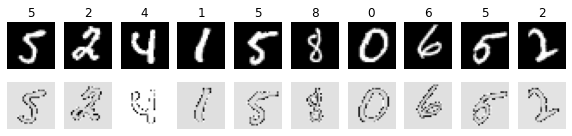

In [7]:
# вывод 10 рандомных изображений
names = makeNames()
n = 10
f = plt.figure(figsize=(n, 2))
for i in range(n):
    j = np.random.randint(0, high = x_train_shape_0, dtype=int)
    ind = genlab_train[j]
    let = names[ind]
    sp = f.add_subplot(2, n, i+1)
    sp.axis('Off')
    img = x_train[j]
    img = img.reshape(img_rows, img_cols)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    sp.set_title(let)
    
    sp1 = f.add_subplot(2, n, i+1+n)
    sp1.axis('Off')
    img = genimg_train[j]
    img = img.reshape(img_rows, img_cols)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.show()

In [8]:
def one_part(units, x):
    x = Dense(units)(x)
    x = LeakyReLU()(x)
    return Dropout(0.25)(x)

In [9]:
latent_size = 32 # Размер латентного пространста
inp = Input(shape = (784, ))
# x = Reshape((-1, ))(inp)
x = one_part(512, inp)
x = one_part(256, x)
x = one_part(128, x)
x = one_part(64, x)
x = Dense(latent_size)(x)
encoded = LeakyReLU()(x)
x = one_part(64, encoded)
x = one_part(128, x)
x = one_part(256, x)
x = one_part(512, x)
decoded = Dense(784, activation = 'sigmoid')(x)
# x = Dense(784, activation = 'sigmoid')(x)
# decoded = Reshape((28, 28, 1))(x)
model = Model(inputs = inp, outputs = decoded)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0     

In [10]:
model.compile(optimizer = Adam(learning_rate=0.001), loss = 'msle')

In [11]:
x_train = x_train.reshape(-1, img_cols * img_rows) / 255.0
genimg_train = genimg_train.reshape(-1, img_cols * img_rows) / 255.0

In [12]:
epochs = 10
batch_size = 100
model.fit(x_train, genimg_train, epochs = epochs, batch_size = batch_size, shuffle = False)

Epoch 1/10
600/600 [==============================] - 17s 27ms/step - loss: 0.0098
Epoch 2/10
600/600 [==============================] - 16s 27ms/step - loss: 0.0087
Epoch 3/10
600/600 [==============================] - 16s 27ms/step - loss: 0.0086
Epoch 4/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0085
Epoch 5/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0084
Epoch 6/10
600/600 [==============================] - 17s 29ms/step - loss: 0.0084
Epoch 7/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0084
Epoch 8/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0083
Epoch 9/10
600/600 [==============================] - 16s 27ms/step - loss: 0.0083
Epoch 10/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0083


In [13]:
pred_train = model.predict(x_train)

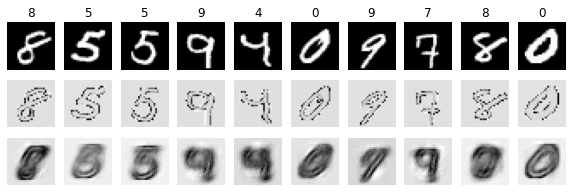

In [14]:
f = plt.figure(figsize=(n, 3))
for i in range(n):
    j = np.random.randint(0, high=len(pred_train), dtype=int)
    sp = f.add_subplot(3, n, i+1)
    sp.axis('Off')
    img = x_train[j]  # .astype('uint8')
    img = img.reshape(img_rows, img_cols)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    sp1 = f.add_subplot(3, n, i+1+n)
    sp1.axis('Off')
    img = genimg_train[j]  # .astype('uint8')
    img = img.reshape(img_rows, img_cols)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    sp2 = f.add_subplot(3, n, i+1+2*n)
    sp2.axis('Off')
    img = pred_train[j] #.astype('uint8')
    img = img.reshape(img_rows, img_cols)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    sp.set_title(names[genlab_train[j]])
plt.show()